<a href="https://colab.research.google.com/github/VijayRameshkumar/TensorFlow_Keras_2.0/blob/master/03.%20LearningCurve%20%26%20ConfusionMatrix/ANN_Bank_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install tensorflow==2.0 --upgrade
! pip install tensorflow-gpu==2.0 --upgrade
import tensorflow as tf


     |████████████████████████████████| 86.3MB 104kB/s 
     |████████████████████████████████| 450kB 56.8MB/s 
     |████████████████████████████████| 3.8MB 44.8MB/s 
     |████████████████████████████████| 81kB 11.0MB/s 
ERROR: tensorboard 2.0.1 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.1 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstall

     |████████████████████████████████| 380.8MB 46kB/s 


In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**1. Data - Preparation**

In [0]:
df = pd.read_csv("/content/drive/My Drive/test/bank-customer-churn-modeling/Churn_Modelling.csv")

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
x = df.drop(labels=['CustomerId', 'Surname', 'RowNumber', 'Exited'], axis=1)
y = df['Exited']
x.shape

(10000, 10)

In [9]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [0]:
cols = x.columns

In [11]:
x.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
dtype: int64

**2. Pre - Processing**

In [0]:
from sklearn.preprocessing import LabelEncoder

In [13]:
encoder = LabelEncoder()
x['Geography'] = encoder.fit_transform(x['Geography'])
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,Female,42,2,0.00,1,1,1,101348.88
1,608,2,Female,41,1,83807.86,1,0,1,112542.58
2,502,0,Female,42,8,159660.80,3,1,0,113931.57
3,699,0,Female,39,1,0.00,2,0,0,93826.63
4,850,2,Female,43,2,125510.82,1,1,1,79084.10


In [14]:
x['Gender'] = encoder.fit_transform(x['Gender'])
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [15]:
x = pd.get_dummies(x, drop_first=True, columns=['Geography'])
x.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_1,Geography_2
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1


**3. Feature Standardization**

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state = 0, stratify = y)

In [0]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [19]:
xtrain

array([[-1.24021723, -1.09665089,  0.77986083, ...,  1.64099027,
        -0.57812007, -0.57504086],
       [ 0.75974873,  0.91186722, -0.27382717, ..., -1.55587522,
         1.72974448, -0.57504086],
       [-1.72725557, -1.09665089, -0.9443559 , ...,  1.1038111 ,
        -0.57812007, -0.57504086],
       ...,
       [-0.51484098,  0.91186722,  0.87565065, ..., -1.01507508,
         1.72974448, -0.57504086],
       [ 0.73902369, -1.09665089, -0.36961699, ..., -1.47887193,
        -0.57812007, -0.57504086],
       [ 0.95663657,  0.91186722, -1.32751517, ...,  0.50945854,
        -0.57812007,  1.73900686]])

**4. Build ANN model**

In [0]:
model = Sequential()
model.add(Dense(x.shape[1], activation='relu', input_dim=x.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [21]:
x.shape[1]

11

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                132       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1536      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 1,797
Trainable params: 1,797
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = model.fit(xtrain, ytrain.to_numpy(), batch_size=10, epochs=10, validation_split=0.2, verbose=1)

Train on 6400 samples, validate on 1600 samples
Epoch 1/10
6400/6400 [==============================] - 4s 574us/sample - loss: 0.4656 - accuracy: 0.8053 - val_loss: 0.4137 - val_accuracy: 0.8238
Epoch 2/10
6400/6400 [==============================] - 2s 358us/sample - loss: 0.4046 - accuracy: 0.8280 - val_loss: 0.3678 - val_accuracy: 0.8450
Epoch 3/10
6400/6400 [==============================] - 2s 365us/sample - loss: 0.3699 - accuracy: 0.8453 - val_loss: 0.3449 - val_accuracy: 0.8581
Epoch 4/10
6400/6400 [==============================] - 2s 355us/sample - loss: 0.3536 - accuracy: 0.8516 - val_loss: 0.3415 - val_accuracy: 0.8681
Epoch 5/10
6400/6400 [==============================] - 2s 360us/sample - loss: 0.3463 - accuracy: 0.8559 - val_loss: 0.3454 - val_accuracy: 0.8562
Epoch 6/10
6400/6400 [==============================] - 2s 360us/sample - loss: 0.3401 - accuracy: 0.8561 - val_loss: 0.3368 - val_accuracy: 0.8675
Epoch 7/10
6400/6400 [==============================] - 2s 362us

In [0]:
y_pred = model.predict_classes(xtest)

In [26]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]], dtype=int32)

In [27]:
ytest

1344    1
8167    0
4747    0
5004    1
3124    1
       ..
9107    0
8249    0
8337    0
6279    1
412     0
Name: Exited, Length: 2000, dtype: int64

In [28]:
model.evaluate(xtest, ytest.to_numpy())

2000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.34822804033756255, 0.858]

**5. Metrics - Accuracy**

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [30]:
confusion_matrix(ytest, y_pred)

array([[1541,   52],
       [ 232,  175]])

In [31]:
history

In [32]:
history.history

{'accuracy': [0.8053125,
  0.8279688,
  0.8453125,
  0.8515625,
  0.8559375,
  0.85609376,
  0.856875,
  0.85765624,
  0.8590625,
  0.8621875],
 'loss': [0.46563632949255407,
  0.40457053648424335,
  0.3699066983535886,
  0.3536326598143205,
  0.3463355128886178,
  0.34006198422866873,
  0.3392556998471264,
  0.3366541575873271,
  0.33389571821608116,
  0.3327395177620929],
 'val_accuracy': [0.82375,
  0.845,
  0.858125,
  0.868125,
  0.85625,
  0.8675,
  0.86125,
  0.869375,
  0.85875,
  0.86625],
 'val_loss': [0.41370750181376936,
  0.3678343763574958,
  0.34485399797558786,
  0.34148204056546094,
  0.3453876765444875,
  0.3367790153250098,
  0.33891219801735134,
  0.33470626806374637,
  0.34121215394698085,
  0.3357266044709831]}

**6. Model Learning Curve**

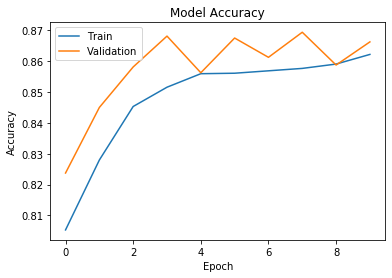

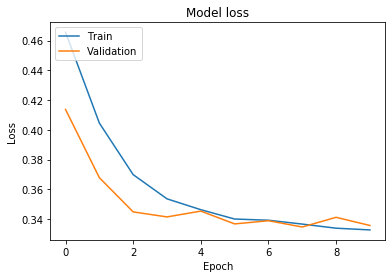

In [34]:
#Plot training and value accuracy values

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss values

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



In [35]:
! pip install mlxtend

In [0]:
from mlxtend.plotting import plot_confusion_matrix

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa5f6308a58>)

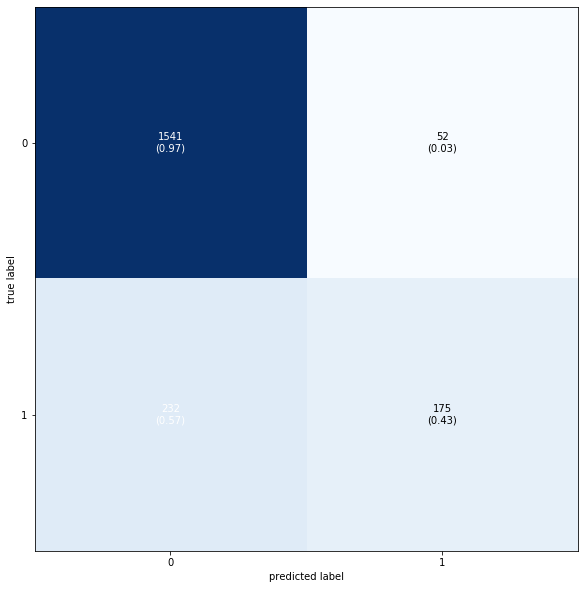

In [37]:
mat = confusion_matrix(ytest, y_pred)
plot_confusion_matrix(conf_mat=mat, figsize=(10,10), show_normed=True)